## Imports

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import networkx as nx
from tqdm.auto import tqdm

In [21]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(device)

cuda:0


In [22]:
def lorenz_step(t, x1, x2, x3, dt, sigma, rho, beta):
    """Calculate the next step in the Lorenz system."""
    dx1 = sigma * (x2 - x1) * dt
    dx2 = (x1 * (rho - x3) - x2) * dt
    dx3 = (x1 * x2 - beta * x3) * dt

    return t + dt, x1 + dx1, x2 + dx2, x3 + dx3

In [23]:
def lorenz(t0, x1_0, x2_0, x3_0, dt, sigma, rho, beta, iter_num):
    """Calculate the evolution of the Lorenz system."""
    t = np.zeros(iter_num + 1)
    x1 = np.zeros(iter_num + 1)
    x2 = np.zeros(iter_num + 1)
    x3 = np.zeros(iter_num + 1)

    t[0], x1[0], x2[0], x3[0] = t0, x1_0, x2_0, x3_0
    for i in range(iter_num):
        t[i + 1], x1[i + 1], x2[i + 1], x3[i + 1] = (
            lorenz_step(t[i], x1[i], x2[i], x3[i], dt, sigma, rho, beta)
        )

    return t, x1, x2, x3

Generate training set

In [24]:
num_series = 1
iter_num = 10000
dt = 0.01
std = 0.05
series = []
for _ in tqdm(range(num_series)):
    t, x1, x2, x3 = lorenz(t0=0, x1_0=np.random.normal(1, std), x2_0=np.random.normal(1, std), x3_0=np.random.normal(1, std), dt=dt,
                        sigma=10, rho=28, beta=8 / 3, iter_num=iter_num)
    series.append([x1, x2, x3])
series = np.array(series)


  0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
x1 = series[0, 0]
x2 = series[0, 1]
x3 = series[0, 2]
x_zip = list(zip(x1, x2, x3))
X = np.array(x_zip)

Text(0.5, 0, 'Time Step')

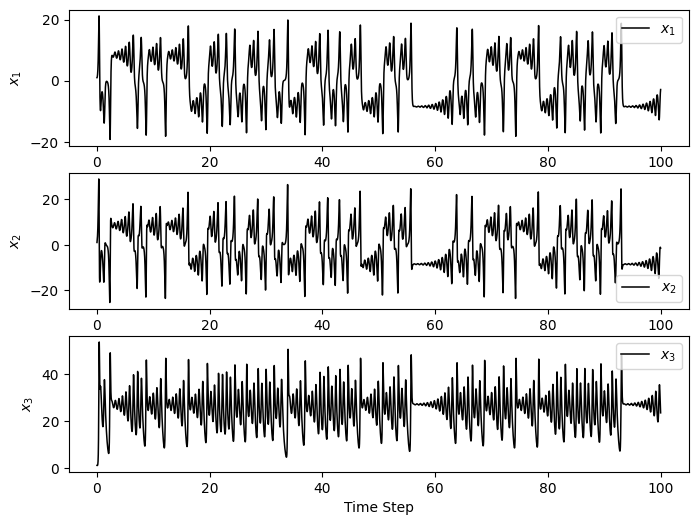

In [26]:
fig, axs = plt.subplots(3, 1, figsize=(8, 6))
X = np.array(x_zip)
for i in range(3):
    axs[i].plot(t, X[:,i], label=fr"$x_{i+1}$", color="k", lw=1.1)
    axs[i].set_ylabel(fr"$x_{i+1}$")
    axs[i].legend()
axs[2].set_xlabel("Time Step")

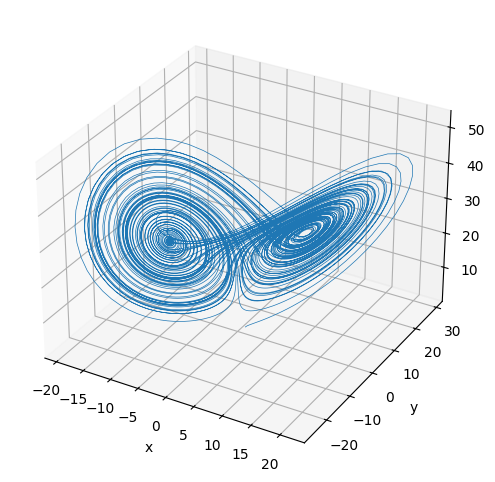

In [27]:
fig= plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection="3d")
ax.plot(x1, x2, x3, lw=0.5)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()